## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime

## Importing NBA2k data from a .csv

In [5]:
df = pd.read_csv('C:/Users/PlaySpace/Downloads/archive (4)/nba2k-full.csv')

## Data cleaning

### Leaving only the most detailed version in this table - NBA2k20

In [6]:
df_20 = df.sort_values(by = ['version'], inplace = False)
df = df_20[df_20['version'] == 'NBA2k20']

In [7]:
df

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
293,Ian Mahinmi,73,#28,Washington Wizards,C,11/05/86,6-11 / 2.11,230 lbs. / 104.3 kg.,$15450051,France,2005,1,28,NaN,NBA2k20
292,Furkan Korkmaz,73,#30,Philadelphia 76ers,F,06/27/97,6-7 / 2.01,185 lbs. / 83.9 kg.,$1620564,Turkey,2016,1,26,NaN,NBA2k20
291,Tyus Jones,73,#21,Memphis Grizzlies,G,05/10/96,6-0 / 1.83,185 lbs. / 83.9 kg.,$10116000,USA,2015,1,24,Duke,NBA2k20
290,Stanley Johnson,73,#5,Toronto Raptors,F,05/29/96,6-6 / 1.98,242 lbs. / 109.8 kg.,$3623000,USA,2015,1,8,Arizona,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Al-Farouq Aminu,77,#2,Orlando Magic,F,09/21/90,6-8 / 2.03,215 lbs. / 97.5 kg.,$9258000,Nigeria,2010,1,8,Wake Forest,NBA2k20
138,De'Andre Hunter,77,#12,Atlanta Hawks,F,12/01/97,6-7 / 2.01,225 lbs. / 102.1 kg.,$7068360,USA,2019,1,4,Virginia,NBA2k20
137,Darius Garland,77,#10,Cleveland Cavaliers,G,06/26/00,6-1 / 1.85,175 lbs. / 79.4 kg.,$6400920,USA,2019,1,5,Vanderbilt,NBA2k20
146,Taj Gibson,77,#67,New York Knicks,F,06/24/85,6-9 / 2.06,225 lbs. / 102.1 kg.,$9000000,USA,2009,1,26,USC,NBA2k20


### Leaving only the columns I am interested in 

In [8]:
selected_columns = ['full_name', 'rating', 'team', 'position', 'b_day', 'height', 'weight', 'salary', 'country', 'draft_year', 'draft_round', 'draft_peak', 'version']
df_project = df[selected_columns]

In [9]:
df_project

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,version
0,LeBron James,97,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NBA2k20
293,Ian Mahinmi,73,Washington Wizards,C,11/05/86,6-11 / 2.11,230 lbs. / 104.3 kg.,$15450051,France,2005,1,28,NBA2k20
292,Furkan Korkmaz,73,Philadelphia 76ers,F,06/27/97,6-7 / 2.01,185 lbs. / 83.9 kg.,$1620564,Turkey,2016,1,26,NBA2k20
291,Tyus Jones,73,Memphis Grizzlies,G,05/10/96,6-0 / 1.83,185 lbs. / 83.9 kg.,$10116000,USA,2015,1,24,NBA2k20
290,Stanley Johnson,73,Toronto Raptors,F,05/29/96,6-6 / 1.98,242 lbs. / 109.8 kg.,$3623000,USA,2015,1,8,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Al-Farouq Aminu,77,Orlando Magic,F,09/21/90,6-8 / 2.03,215 lbs. / 97.5 kg.,$9258000,Nigeria,2010,1,8,NBA2k20
138,De'Andre Hunter,77,Atlanta Hawks,F,12/01/97,6-7 / 2.01,225 lbs. / 102.1 kg.,$7068360,USA,2019,1,4,NBA2k20
137,Darius Garland,77,Cleveland Cavaliers,G,06/26/00,6-1 / 1.85,175 lbs. / 79.4 kg.,$6400920,USA,2019,1,5,NBA2k20
146,Taj Gibson,77,New York Knicks,F,06/24/85,6-9 / 2.06,225 lbs. / 102.1 kg.,$9000000,USA,2009,1,26,NBA2k20


### Removing height in feet, weight in pounds and a dollar sign from salary

In [10]:
df_project['height'] = df_project['height'].astype(str).str[-4:]
df_project['weight'] = df_project['weight'].astype(str).str[10:-4]
df_project['salary'] = df_project['salary'].astype(str).str[1:]

C:\Users\PlaySpace\AppData\Local\Temp\ipykernel_12560\35910154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['height'] = df_project['height'].astype(str).str[-4:]
C:\Users\PlaySpace\AppData\Local\Temp\ipykernel_12560\35910154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['weight'] = df_project['weight'].astype(str).str[10:-4]
C:\Users\PlaySpace\AppData\Local\Temp\ipykernel_12560\35910154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [11]:
df_project

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,version
0,LeBron James,97,Los Angeles Lakers,F,12/30/84,2.06,113.4,37436858,USA,2003,1,1,NBA2k20
293,Ian Mahinmi,73,Washington Wizards,C,11/05/86,2.11,104.3,15450051,France,2005,1,28,NBA2k20
292,Furkan Korkmaz,73,Philadelphia 76ers,F,06/27/97,2.01,83.9,1620564,Turkey,2016,1,26,NBA2k20
291,Tyus Jones,73,Memphis Grizzlies,G,05/10/96,1.83,83.9,10116000,USA,2015,1,24,NBA2k20
290,Stanley Johnson,73,Toronto Raptors,F,05/29/96,1.98,109.8,3623000,USA,2015,1,8,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Al-Farouq Aminu,77,Orlando Magic,F,09/21/90,2.03,97.5,9258000,Nigeria,2010,1,8,NBA2k20
138,De'Andre Hunter,77,Atlanta Hawks,F,12/01/97,2.01,102.1,7068360,USA,2019,1,4,NBA2k20
137,Darius Garland,77,Cleveland Cavaliers,G,06/26/00,1.85,79.4,6400920,USA,2019,1,5,NBA2k20
146,Taj Gibson,77,New York Knicks,F,06/24/85,2.06,102.1,9000000,USA,2009,1,26,NBA2k20


### Converting "undrafted" to 3 and 61 for an easy draft-related correlation analysis

In [12]:
df_project.loc[df_project['draft_round'] == 'Undrafted', 'draft_round'] = '3'
df_project.loc[df_project['draft_peak'] == 'Undrafted', 'draft_peak'] = '61'

In [13]:
df_project

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,version
0,LeBron James,97,Los Angeles Lakers,F,12/30/84,2.06,113.4,37436858,USA,2003,1,1,NBA2k20
293,Ian Mahinmi,73,Washington Wizards,C,11/05/86,2.11,104.3,15450051,France,2005,1,28,NBA2k20
292,Furkan Korkmaz,73,Philadelphia 76ers,F,06/27/97,2.01,83.9,1620564,Turkey,2016,1,26,NBA2k20
291,Tyus Jones,73,Memphis Grizzlies,G,05/10/96,1.83,83.9,10116000,USA,2015,1,24,NBA2k20
290,Stanley Johnson,73,Toronto Raptors,F,05/29/96,1.98,109.8,3623000,USA,2015,1,8,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Al-Farouq Aminu,77,Orlando Magic,F,09/21/90,2.03,97.5,9258000,Nigeria,2010,1,8,NBA2k20
138,De'Andre Hunter,77,Atlanta Hawks,F,12/01/97,2.01,102.1,7068360,USA,2019,1,4,NBA2k20
137,Darius Garland,77,Cleveland Cavaliers,G,06/26/00,1.85,79.4,6400920,USA,2019,1,5,NBA2k20
146,Taj Gibson,77,New York Knicks,F,06/24/85,2.06,102.1,9000000,USA,2009,1,26,NBA2k20


### Converting to numerical data types for an easy draft-related correlation analysis

In [14]:
df_project['height'] = df_project['height'].astype(float)
df_project['weight'] = df_project['weight'].astype(float)
df_project['salary'] = df_project['salary'].astype('int64')
df_project['draft_round'] = df_project['draft_round'].astype('int64')
df_project['draft_peak'] = df_project['draft_peak'].astype('int64')

C:\Users\PlaySpace\AppData\Local\Temp\ipykernel_12560\782269320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['height'] = df_project['height'].astype(float)
C:\Users\PlaySpace\AppData\Local\Temp\ipykernel_12560\782269320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['weight'] = df_project['weight'].astype(float)
C:\Users\PlaySpace\AppData\Local\Temp\ipykernel_12560\782269320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [15]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 136
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_name    429 non-null    object 
 1   rating       429 non-null    int64  
 2   team         406 non-null    object 
 3   position     429 non-null    object 
 4   b_day        429 non-null    object 
 5   height       429 non-null    float64
 6   weight       429 non-null    float64
 7   salary       429 non-null    int64  
 8   country      429 non-null    object 
 9   draft_year   429 non-null    int64  
 10  draft_round  429 non-null    int64  
 11  draft_peak   429 non-null    int64  
 12  version      429 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 46.9+ KB


### Making a boolean data column that shows if the player is american or not for further comparisons

In [16]:
df_project['is_american'] = df_project['country'] == 'USA'

C:\Users\PlaySpace\AppData\Local\Temp\ipykernel_12560\413334875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['is_american'] = df_project['country'] == 'USA'


In [17]:
df_project

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,version,is_american
0,LeBron James,97,Los Angeles Lakers,F,12/30/84,2.06,113.4,37436858,USA,2003,1,1,NBA2k20,True
293,Ian Mahinmi,73,Washington Wizards,C,11/05/86,2.11,104.3,15450051,France,2005,1,28,NBA2k20,False
292,Furkan Korkmaz,73,Philadelphia 76ers,F,06/27/97,2.01,83.9,1620564,Turkey,2016,1,26,NBA2k20,False
291,Tyus Jones,73,Memphis Grizzlies,G,05/10/96,1.83,83.9,10116000,USA,2015,1,24,NBA2k20,True
290,Stanley Johnson,73,Toronto Raptors,F,05/29/96,1.98,109.8,3623000,USA,2015,1,8,NBA2k20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Al-Farouq Aminu,77,Orlando Magic,F,09/21/90,2.03,97.5,9258000,Nigeria,2010,1,8,NBA2k20,False
138,De'Andre Hunter,77,Atlanta Hawks,F,12/01/97,2.01,102.1,7068360,USA,2019,1,4,NBA2k20,True
137,Darius Garland,77,Cleveland Cavaliers,G,06/26/00,1.85,79.4,6400920,USA,2019,1,5,NBA2k20,True
146,Taj Gibson,77,New York Knicks,F,06/24/85,2.06,102.1,9000000,USA,2009,1,26,NBA2k20,True


### Making a int data column that shows player's ages for further comparisons

In [18]:
df_project['b_day'] = pd.to_datetime(df_project['b_day'], format="%m/%d/%y")
df_project['year'] = df_project['b_day'].dt.year
df_project['age'] = 2020 - df_project['year']

C:\Users\PlaySpace\AppData\Local\Temp\ipykernel_12560\274881860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['b_day'] = pd.to_datetime(df_project['b_day'], format="%m/%d/%y")


In [19]:
df_project

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,version,is_american,year,age
0,LeBron James,97,Los Angeles Lakers,F,1984-12-30,2.06,113.4,37436858,USA,2003,1,1,NBA2k20,True,1984,36
293,Ian Mahinmi,73,Washington Wizards,C,1986-11-05,2.11,104.3,15450051,France,2005,1,28,NBA2k20,False,1986,34
292,Furkan Korkmaz,73,Philadelphia 76ers,F,1997-06-27,2.01,83.9,1620564,Turkey,2016,1,26,NBA2k20,False,1997,23
291,Tyus Jones,73,Memphis Grizzlies,G,1996-05-10,1.83,83.9,10116000,USA,2015,1,24,NBA2k20,True,1996,24
290,Stanley Johnson,73,Toronto Raptors,F,1996-05-29,1.98,109.8,3623000,USA,2015,1,8,NBA2k20,True,1996,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Al-Farouq Aminu,77,Orlando Magic,F,1990-09-21,2.03,97.5,9258000,Nigeria,2010,1,8,NBA2k20,False,1990,30
138,De'Andre Hunter,77,Atlanta Hawks,F,1997-12-01,2.01,102.1,7068360,USA,2019,1,4,NBA2k20,True,1997,23
137,Darius Garland,77,Cleveland Cavaliers,G,2000-06-26,1.85,79.4,6400920,USA,2019,1,5,NBA2k20,True,2000,20
146,Taj Gibson,77,New York Knicks,F,1985-06-24,2.06,102.1,9000000,USA,2009,1,26,NBA2k20,True,1985,35


### Making table contain only the names of the teams for easier view

In [20]:
df_project['team'] = df_project['team'].astype(str).str.split().str[-1]

In [21]:
df_project

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,version,is_american,year,age
0,LeBron James,97,Lakers,F,1984-12-30,2.06,113.4,37436858,USA,2003,1,1,NBA2k20,True,1984,36
293,Ian Mahinmi,73,Wizards,C,1986-11-05,2.11,104.3,15450051,France,2005,1,28,NBA2k20,False,1986,34
292,Furkan Korkmaz,73,76ers,F,1997-06-27,2.01,83.9,1620564,Turkey,2016,1,26,NBA2k20,False,1997,23
291,Tyus Jones,73,Grizzlies,G,1996-05-10,1.83,83.9,10116000,USA,2015,1,24,NBA2k20,True,1996,24
290,Stanley Johnson,73,Raptors,F,1996-05-29,1.98,109.8,3623000,USA,2015,1,8,NBA2k20,True,1996,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Al-Farouq Aminu,77,Magic,F,1990-09-21,2.03,97.5,9258000,Nigeria,2010,1,8,NBA2k20,False,1990,30
138,De'Andre Hunter,77,Hawks,F,1997-12-01,2.01,102.1,7068360,USA,2019,1,4,NBA2k20,True,1997,23
137,Darius Garland,77,Cavaliers,G,2000-06-26,1.85,79.4,6400920,USA,2019,1,5,NBA2k20,True,2000,20
146,Taj Gibson,77,Knicks,F,1985-06-24,2.06,102.1,9000000,USA,2009,1,26,NBA2k20,True,1985,35


### Correcting a type-o

In [22]:
draft_peak_name = 'draft_pick'
df_project.rename(columns={'draft_peak': draft_peak_name}, inplace=True)

In [23]:
df_project

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_pick,version,is_american,year,age
0,LeBron James,97,Lakers,F,1984-12-30,2.06,113.4,37436858,USA,2003,1,1,NBA2k20,True,1984,36
293,Ian Mahinmi,73,Wizards,C,1986-11-05,2.11,104.3,15450051,France,2005,1,28,NBA2k20,False,1986,34
292,Furkan Korkmaz,73,76ers,F,1997-06-27,2.01,83.9,1620564,Turkey,2016,1,26,NBA2k20,False,1997,23
291,Tyus Jones,73,Grizzlies,G,1996-05-10,1.83,83.9,10116000,USA,2015,1,24,NBA2k20,True,1996,24
290,Stanley Johnson,73,Raptors,F,1996-05-29,1.98,109.8,3623000,USA,2015,1,8,NBA2k20,True,1996,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Al-Farouq Aminu,77,Magic,F,1990-09-21,2.03,97.5,9258000,Nigeria,2010,1,8,NBA2k20,False,1990,30
138,De'Andre Hunter,77,Hawks,F,1997-12-01,2.01,102.1,7068360,USA,2019,1,4,NBA2k20,True,1997,23
137,Darius Garland,77,Cavaliers,G,2000-06-26,1.85,79.4,6400920,USA,2019,1,5,NBA2k20,True,2000,20
146,Taj Gibson,77,Knicks,F,1985-06-24,2.06,102.1,9000000,USA,2009,1,26,NBA2k20,True,1985,35


## Quick testing on Joe Ingles - a random current undrafted player of the top of my head

In [24]:
print(df_project[df_project['full_name'] == 'Joe Ingles'])

      full_name  rating  team position      b_day  height  weight    salary  \
101  Joe Ingles      79  Jazz        F 1987-10-02    2.01    94.8  11454546   

       country  draft_year  draft_round  draft_pick  version  is_american  \
101  Australia        2009            3          61  NBA2k20        False   

     year  age  
101  1987   33  


In [25]:
print(df_project.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 136
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    429 non-null    object        
 1   rating       429 non-null    int64         
 2   team         429 non-null    object        
 3   position     429 non-null    object        
 4   b_day        429 non-null    datetime64[ns]
 5   height       429 non-null    float64       
 6   weight       429 non-null    float64       
 7   salary       429 non-null    int64         
 8   country      429 non-null    object        
 9   draft_year   429 non-null    int64         
 10  draft_round  429 non-null    int64         
 11  draft_pick   429 non-null    int64         
 12  version      429 non-null    object        
 13  is_american  429 non-null    bool          
 14  year         429 non-null    int64         
 15  age          429 non-null    int64         
dtypes: bool(

## Correlation analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'rating'),
  Text(0, 1.5, 'height'),
  Text(0, 2.5, 'weight'),
  Text(0, 3.5, 'salary'),
  Text(0, 4.5, 'draft_year'),
  Text(0, 5.5, 'draft_round'),
  Text(0, 6.5, 'draft_pick'),
  Text(0, 7.5, 'is_american'),
  Text(0, 8.5, 'year'),
  Text(0, 9.5, 'age')])

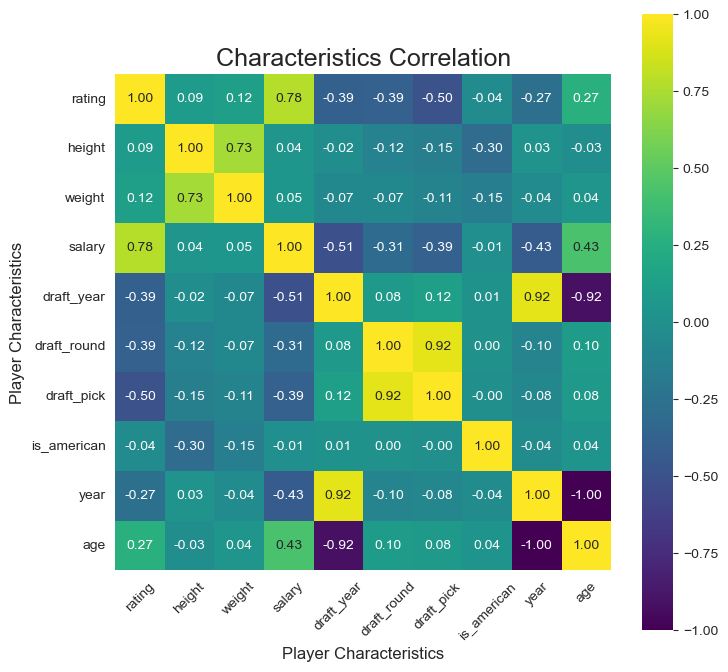

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize = (8, 8))
correalation_matrix = df_project.corr(numeric_only = True).round(4)
sns.heatmap(correalation_matrix, annot=True, cmap='viridis', square = True, fmt=".2f")
plt.title('Characteristics Correlation', fontsize=18)
plt.xlabel('Player Characteristics', fontsize=12)
plt.ylabel('Player Characteristics', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

## Data Analysis

### Average height per position bar plot

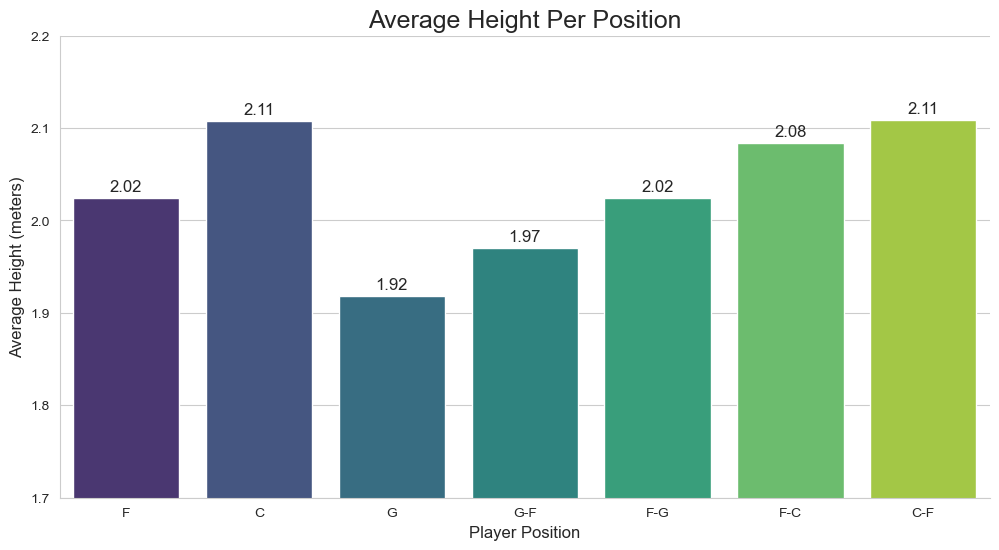

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
barplot_hp = sns.barplot(x = 'position', y = 'height', data = df_project, palette = 'viridis', errorbar=None)
for bar in barplot_hp.patches:
  barplot_hp.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(1.70, 2.20)
plt.title('Average Height Per Position', fontsize=18)
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Average Height (meters)', fontsize=12)
sns.despine()

### Salary vs Rating scatter plot

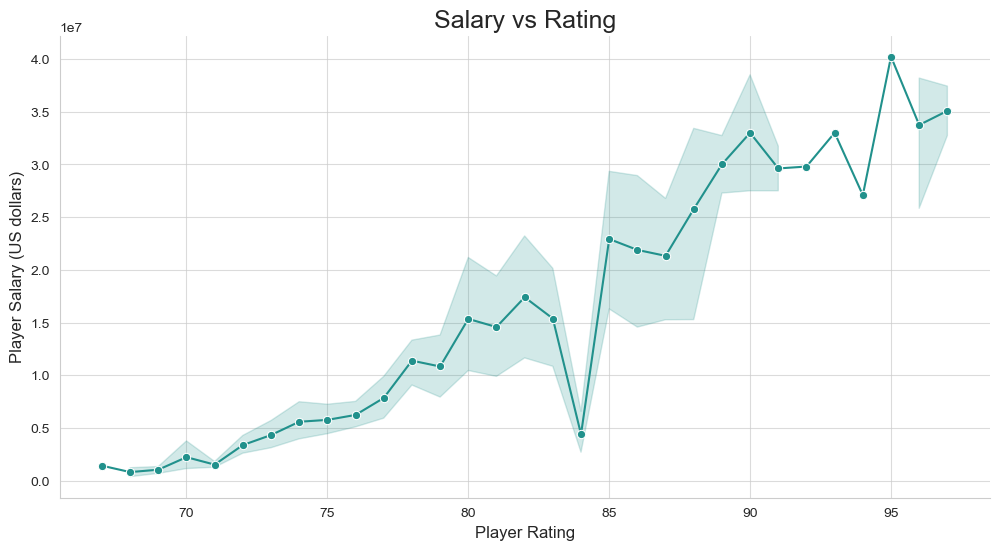

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.grid(True, linestyle='-', alpha=0.7)
sns.lineplot(x = 'rating', y = 'salary', data = df_project, color = '#21918c', marker='o')
plt.title('Salary vs Rating', fontsize=18)
plt.xlabel('Player Rating', fontsize=12)
plt.ylabel('Player Salary (US dollars)', fontsize=12)
sns.despine()

In [29]:
df_project[df_project['rating'] == 84]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_pick,version,is_american,year,age
53,Louis Williams,84,Clippers,G,1986-10-27,1.85,79.4,8000000,USA,2005,2,45,NBA2k20,True,1986,34
51,Kyle Kuzma,84,Lakers,F,1995-07-24,2.03,100.2,1974600,USA,2017,1,27,NBA2k20,True,1995,25
52,Jamal Murray,84,Nuggets,G,1997-02-23,1.93,91.2,4444746,Canada,2016,1,7,NBA2k20,False,1997,23
50,Buddy Hield,84,Kings,G,1993-12-17,1.93,96.2,4861207,The Bahamas,2016,1,6,NBA2k20,False,1993,27
49,John Collins,84,Hawks,F,1997-09-23,2.06,102.1,2686560,USA,2017,1,19,NBA2k20,True,1997,23


### Nationality distribution pie charts

Text(0.5, 1.0, 'Non-US Players Distribution')

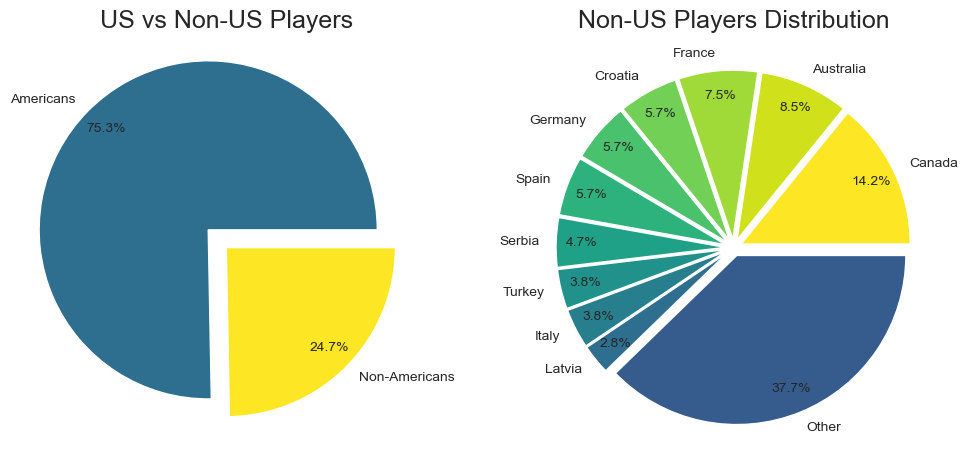

In [30]:
sns.set_style("whitegrid")
num_americans = df_project['is_american'].sum()
num_non_americans = len(df_project) - num_americans
total_players = len(df_project)
percent_americans = (num_americans / total_players) * 100
percent_non_americans = (num_non_americans / total_players) * 100
sizes = [percent_americans, percent_non_americans]
non_usa_players = df_project[~df_project['is_american']]
country_counts = non_usa_players['country'].value_counts()
top_countries = country_counts.head(10)
other_countries_count = len(non_usa_players) - top_countries.sum()
top_countries['Other'] = other_countries_count
labels_2 = top_countries.index
sizes_2 = top_countries.values
label_fontsize = 10
pctdistance = 0.85 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
explode_us = (0.15, 0)
axes[0].pie(sizes, explode = explode_us, labels = ['Americans', 'Non-Americans'], autopct = '%1.1f%%', colors = ['#2e6e8e', '#fde725'], textprops={'fontsize': label_fontsize}, pctdistance=pctdistance)
axes[0].set_title('US vs Non-US Players', fontsize=18)
explode_non_us = [0.05] * len(labels_2)
axes[1].pie(sizes_2, labels = labels_2, autopct = '%1.1f%%', explode = explode_non_us, colors = ['#fde725', '#d0e11c', '#a0da39', '#73d056', '#4ac16d', '#2db27d', '#1fa187', '#21918c', '#277f8e', '#2e6e8e', '#365c8d'], textprops={'fontsize': label_fontsize}, pctdistance=pctdistance)
axes[1].set_title('Non-US Players Distribution', fontsize=18)

### Finding out the best active draft class using a mean of ratings

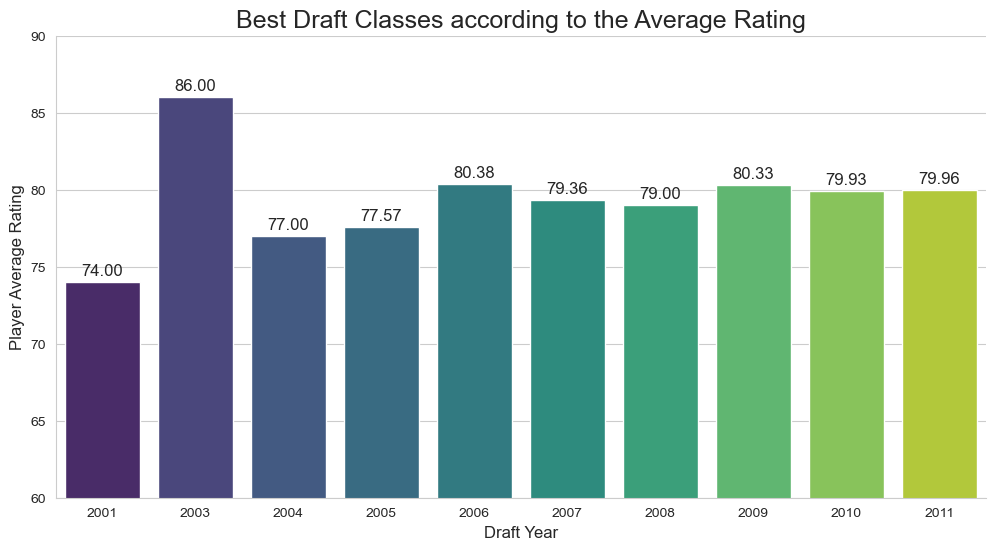

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
rating_mean_year = df_project.groupby('draft_year')['rating'].mean().reset_index()
columns_needed = ['draft_year', 'rating']
top_year = rating_mean_year[columns_needed].head(10)
barplot_mr = sns.barplot(x = 'draft_year', y = 'rating', data = top_year, palette = 'viridis')
for bar in barplot_mr.patches:
  barplot_mr.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Best Draft Classes according to the Average Rating', fontsize=18)
plt.xlabel('Draft Year', fontsize=12)
plt.ylabel('Player Average Rating', fontsize=12)
plt.ylim(60, 90)
sns.despine()

### Finding out the best draft number to pick by rating

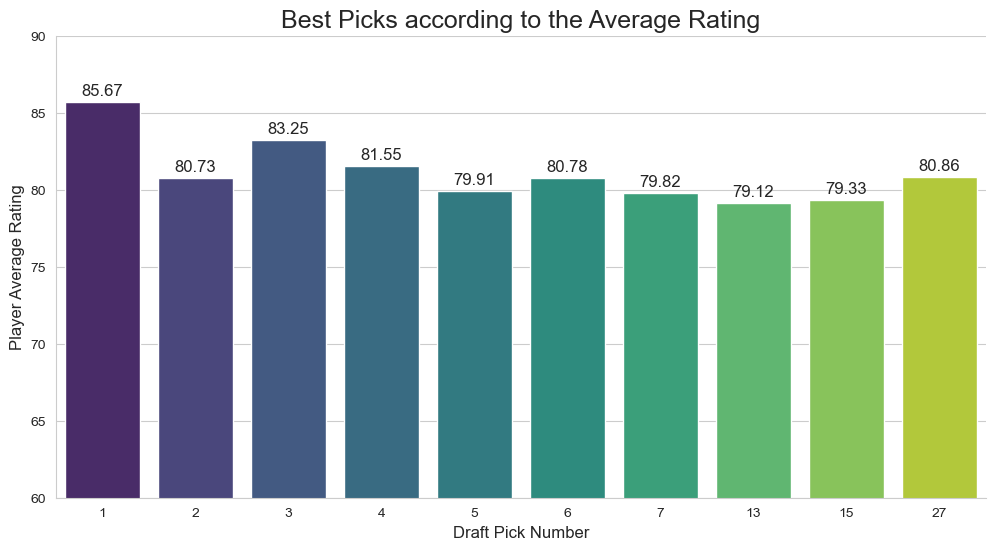

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
rating_mean_pick = df_project.groupby('draft_pick')['rating'].mean().reset_index()
rating_mean_pick = rating_mean_pick.sort_values(by = 'rating', ascending=False)
columns_needed = ['draft_pick', 'rating']
top_pick = rating_mean_pick[columns_needed].head(10)
barplot_bp = sns.barplot(x = top_pick['draft_pick'], y = top_pick['rating'], data = top_pick, palette = 'viridis')
for bar in barplot_bp.patches:
  barplot_bp.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Best Picks according to the Average Rating', fontsize=18)
plt.xlabel('Draft Pick Number', fontsize=12)
plt.ylabel('Player Average Rating', fontsize=12)
plt.ylim(60, 90)
sns.despine()

In [35]:
df_project[df_project['draft_pick'] == 27]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_pick,version,is_american,year,age
269,Robert Williams,74,Celtics,F-C,1997-10-17,2.03,107.5,1937520,USA,2018,1,27,NBA2k20,True,1997,23
51,Kyle Kuzma,84,Lakers,F,1995-07-24,2.03,100.2,1974600,USA,2017,1,27,NBA2k20,True,1995,25
16,Rudy Gobert,88,Jazz,C,1992-06-26,2.16,108.0,25258427,France,2013,1,27,NBA2k20,False,1992,28
29,Pascal Siakam,87,Raptors,F,1994-04-02,2.06,103.0,2351838,Cameroon,2016,1,27,NBA2k20,False,1994,26
127,Larry Nance Jr,78,Cavaliers,F,1993-01-01,2.01,103.0,12727273,USA,2015,1,27,NBA2k20,True,1993,27
115,Bogdan Bogdanovic,78,Kings,G,1992-08-18,1.98,93.0,8529386,Serbia,2014,1,27,NBA2k20,False,1992,28
144,DeMarre Carroll,77,Rockets,F,1986-07-27,1.98,96.2,7339258,USA,2009,1,27,NBA2k20,True,1986,34


### Best teams by average rating, salary, the youngest team and the highest-picked-players team

Text(0, 0.5, 'Average Player Draft Pick Number')

<Figure size 1200x600 with 0 Axes>

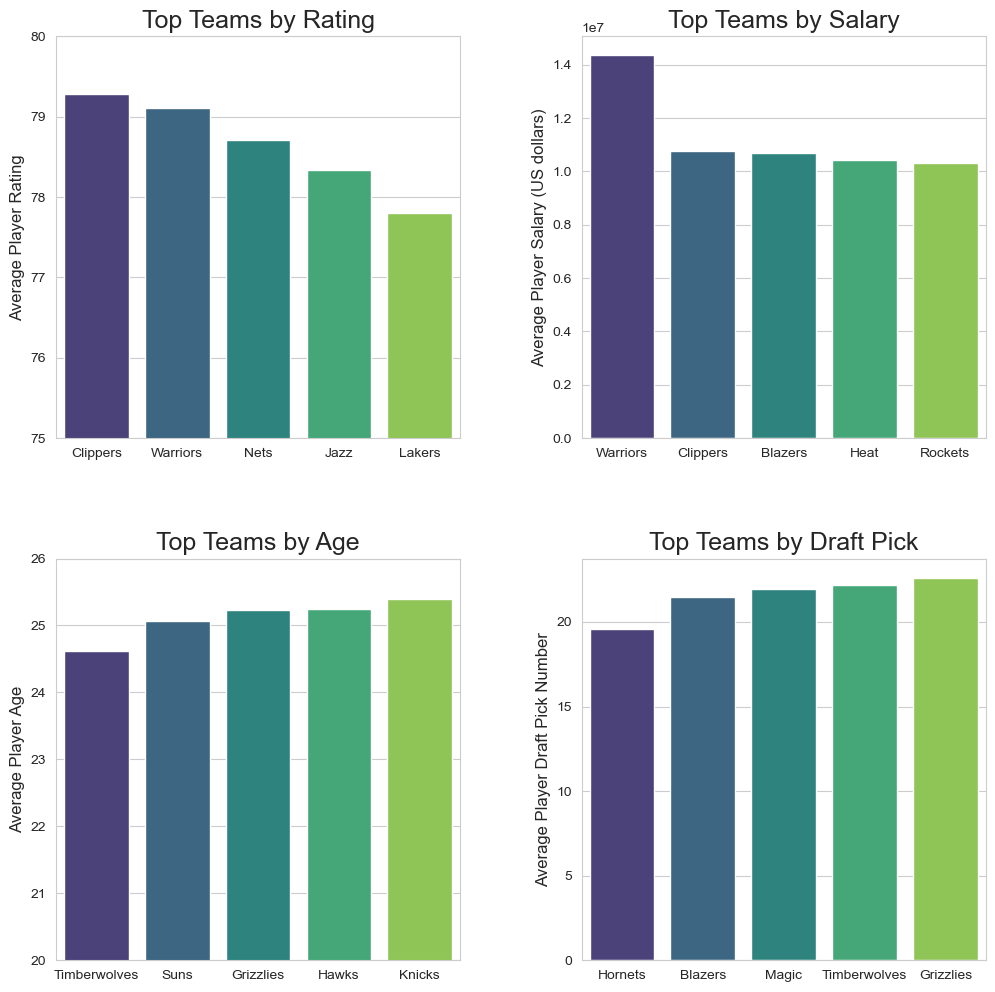

In [172]:
plt.figure(figsize = (12, 6))
rating_mean_team = df_project.groupby('team')['rating'].mean().reset_index()
rating_mean_team = rating_mean_team.sort_values(by = 'rating', ascending=False)
columns_needed_rating = ['team', 'rating']
top_pick_rating = rating_mean_team[columns_needed_rating].head(5)
salary_mean_team = df_project.groupby('team')['salary'].mean().reset_index()
salary_mean_team = salary_mean_team.sort_values(by = 'salary', ascending=False)
columns_needed_salary = ['team', 'salary']
top_pick_salary = salary_mean_team[columns_needed_salary].head(5)
age_mean_team = df_project.groupby('team')['age'].mean().reset_index()
age_mean_team = age_mean_team.sort_values(by = 'age', ascending=True)
columns_needed_age = ['team', 'age']
top_pick_age = age_mean_team[columns_needed_age].head(5)
draft_pick_mean_team = df_project.groupby('team')['draft_pick'].mean().reset_index()
draft_pick_mean_team = draft_pick_mean_team.sort_values(by = 'draft_pick', ascending=True)
columns_needed_draft_pick = ['team', 'draft_pick']
top_pick_draft_pick = draft_pick_mean_team[columns_needed_draft_pick].head(5)
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12), gridspec_kw = {'hspace': 0.3, 'wspace': 0.3})
sns.barplot(x = top_pick_rating['team'], y = top_pick_rating['rating'], data = top_pick_rating, palette = 'viridis', ax = axes[0, 0])
axes[0, 0].set_ylim(75, 80)
axes[0, 0].set_title('Top Teams by Rating', fontsize=18)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Average Player Rating', fontsize=12)
sns.barplot(x = top_pick_salary['team'], y = top_pick_salary['salary'], data = top_pick_salary, palette = 'viridis', ax = axes[0, 1])
axes[0, 1].set_title('Top Teams by Salary', fontsize=18)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Average Player Salary (US dollars)', fontsize=12)
sns.barplot(x = top_pick_age['team'], y = top_pick_age['age'], data = top_pick_age, palette = 'viridis', ax = axes[1, 0])
axes[1, 0].set_title('Top Teams by Age', fontsize=18)
axes[1, 0].set_ylim(20, 26)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Average Player Age', fontsize=12)
sns.barplot(x = top_pick_draft_pick['team'], y = top_pick_draft_pick['draft_pick'], data = top_pick_draft_pick, palette = 'viridis', ax = axes[1, 1])
axes[1, 1].set_title('Top Teams by Draft Pick', fontsize=18)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Average Player Draft Pick Number', fontsize=12)

### Height Difference Between American and Non-American Players

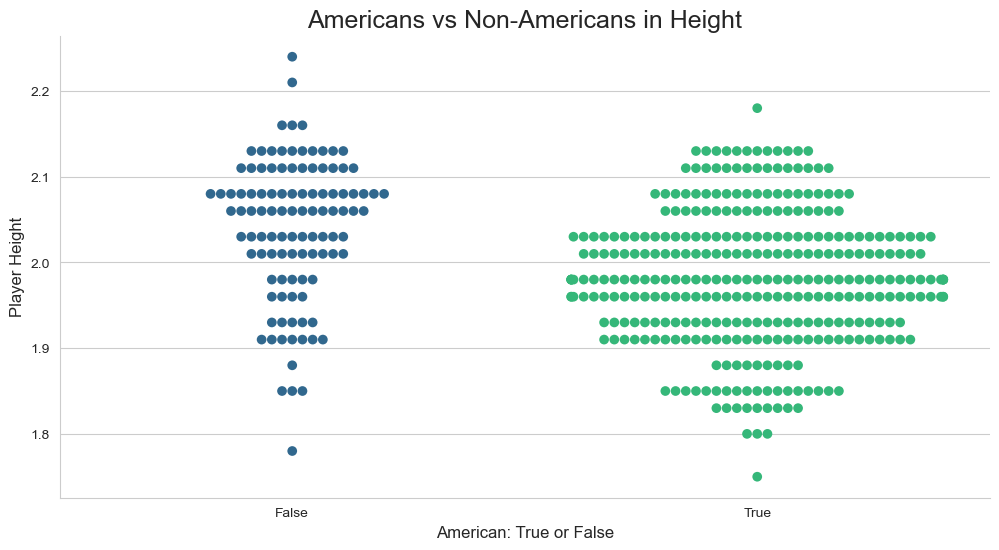

In [204]:
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
sns.swarmplot(x = 'is_american', y = 'height', data = df_project, hue = 'is_american', palette = 'viridis', legend = False, size = 7)
plt.title('Americans vs Non-Americans in Height', fontsize=18)
plt.xlabel('American: True or False', fontsize=12)
plt.ylabel('Player Height', fontsize=12)
sns.despine()

Text(0, 0.5, 'Player ')

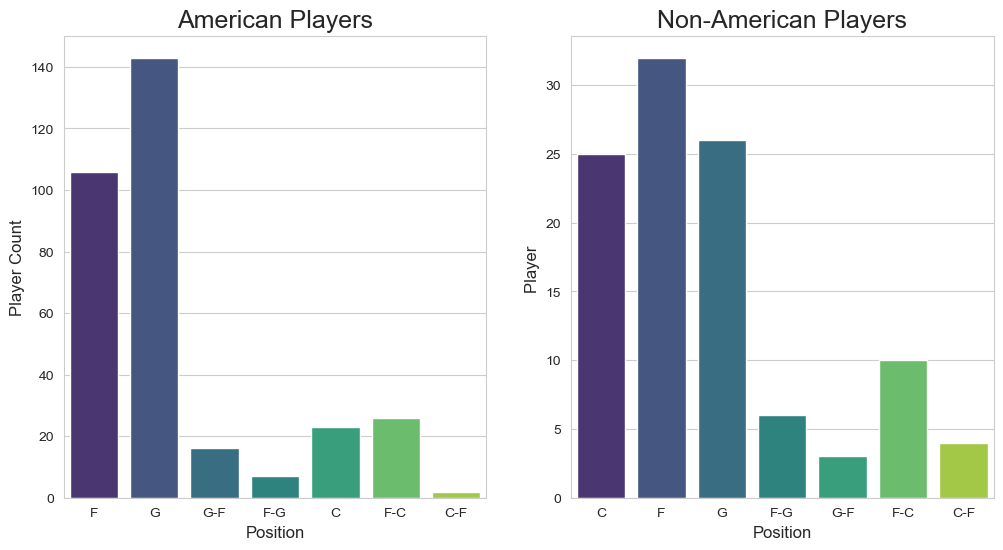

In [39]:
sns.set_style("whitegrid")
american_df = df_project[df_project['is_american'] == True]
foreign_df = df_project[df_project['is_american'] == False]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='position', data=american_df, palette='viridis', ax=axes[0])
axes[0].set_title('American Players', fontsize=18)
axes[0].set_xlabel('Position', fontsize=12)
axes[0].set_ylabel('Player Count', fontsize=12)
sns.countplot(x='position', data=foreign_df, palette='viridis', ax=axes[1])
axes[1].set_title('Non-American Players', fontsize=18)
axes[1].set_xlabel('Position', fontsize=12)
axes[1].set_ylabel('Player ', fontsize=12)


## Project Conclusions

### Correlation-Based Conclusions

##### - We can see two pairs of highly correlated measures. Firstly, height and weight. These measures are generally correlated across all humans, especially ones that do competitive sports. Salary and rating are not too obvious. Rating in NBA2K games is generally used to represent the skill level of a player, whereas high salaries are often paid to better players and vice versa. Therefore, high correlation between these two pairs of measures is not surprising to see. Only thing to conclude is that player rating can be a good representation of salary range player is in, even though it is a subjective measure of players' skill sets.

##### - All three of draft-related measures presented and player ages have medium (or very close to medium) correlations with both salary and rating. This proves the previous point about the similarity between rating and salary in terms of representation from another perspective. However, the main conclusion is that generally players who stayed in the NBA for many years, as well as players picked early in the draft have better ratings and salaries. 

##### - There is one very specific and extraordinary correlation discovered. Boolean is_american that represents if players are from the US or not has a close-to-medium correlation with players' height. It means that generally non-American players in the NBA are taller than the Americans. From my personal knowledge and the further analysis, I can think of one reason of this event. In the NBA, popular foreign players often play forward or center positions, which require physical abilities and, most importantly, the minimum of 2m of height on average. 

### Data Analysis-Based Conclusions

##### First graph gives us an insight on how height is distributed across the players' positions. Guards are under the 2-meter mark, while forwards and centers are taller than 2 meters on average.

##### Second chart is showing the relationship between strongly correlated ratings and salaries. There is an extraordinary point visible on the visualisation - rating 84. Fall in average salary was most likely caused by following 2 factors: decline in real-life performance (ex. Kyle Kuzma) and players being on a verge of resigning (ex. Jamal Murray). This anomaly really shows that even though ratings and salaries are connected, these measures are very far from being perfectly correlated.

##### Third visualisation consists of two pie charts that are showing the nationality distribution in the league. First graph shows that only a quarter of players are not from the United States, which, in my opinion, states a lack of diversity in the NBA. The biggest part of foreign players is from Canada. It is logical, knowing the fact that Canada is bordering the US and the city of Toronto has its own team in the league. 

##### Fourth and Fifth graphs show the best draft classes and pick numbers according to the average player ratings. Negative medium correlation takes place and it is visible on both visualisations. One of the earliest draft classes - 2003 is by far the best by rating. First seven picks obviously appear in table 5, but there are some extraordinary placements: pick 13 and 15 are in the top-10 and, most importantly, pick 27 is 4th on the list. It is interesting and unexpected for players drafted this late in the draft to all have great ratings (ex. Rudy Gobert and Pascal Siakam). 

##### Sixth set of bars charts show that:
###### - the best rated team is Clippers, the most valuable player that season was not in any team of this top-5 and NBA champions were just fifth place by rating;
###### - Warriors are by far the best-paying team, second team by rating is first in this category and vice versa;
###### - Timberwolves is the youngest team, none of the teams in this category are the best-paying or best-rated;
###### - Hornets are the highest-picked team; category consists of two of the youngest teams.

##### Seventh swarm plot depicts the relationship of is_american and height, which was discovered in the correlation analysis. It shows that non-Americans have a tendency of being taller than Americans in the NBA (see correlation conclusion number 3).

##### Eighth and last pair of graphs shows the relationship of is_american and height, but from another perspective. As said before (see correlation conclusion number 3 and analysis conclusion number 7), foreign players tend to be taller, and, theoretically, more frequently play forward and center positions. These two plots prove the theoretical assumption I made. There are more foreign centers than American centers, even though only a quarter of all players are from another countries (see analysis conclusion number 3). There is a ton of non-American guards, but there are more forwards from other countries, whereas Americans have the opposite situation.